# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-8 (48일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

이번에는 PCA 결과 분석 관련 다양한 그래프 표현에 관련해서 설명을 하고 다음에 왜 고유값, 고유벡터를 해야하는지 이유를 설명하겠습니다. 실은 고유벡터는 공분산, 분산과 관련이 있습니다.

### 주성분 분석을 좀더 이해하기 위해서 이번에는 연습문제 입니다.

#### Bulls.csv 
* 경매 시장에서 거래된 76 마리의 2살 이하 황소의 특징과 거래가격 (SalePr) 자료
* SalePr 과 Breed 변수를 제외한 7개의 변수를 사용해 주성분 분석을 시행하고 다음을 질문을 해결 하시오.


In [147]:
bulls = read.csv("bulls.csv", header = T)

In [148]:
head(bulls)

Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
1,2200,51.0,1128,70.9,7,0.25,54.8,1720
1,2250,51.9,1108,72.1,7,0.25,55.3,1575
1,1625,49.9,1011,71.6,6,0.15,53.1,1410
1,4600,53.1,993,68.9,8,0.35,56.4,1595
1,2150,51.2,996,68.6,7,0.25,55.0,1488
1,1225,49.2,985,71.4,6,0.15,51.4,1500


In [149]:
# 이중 2개의 변수를 제거하고 7개의 변수만 선택합니다.
bullsV7 = bulls[, -c(1,2)]
head(bullsV7)

YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
51.0,1128,70.9,7,0.25,54.8,1720
51.9,1108,72.1,7,0.25,55.3,1575
49.9,1011,71.6,6,0.15,53.1,1410
53.1,993,68.9,8,0.35,56.4,1595
51.2,996,68.6,7,0.25,55.0,1488
49.2,985,71.4,6,0.15,51.4,1500


In [150]:
# 공분산 행렬을 뽑아보면
library(psych)

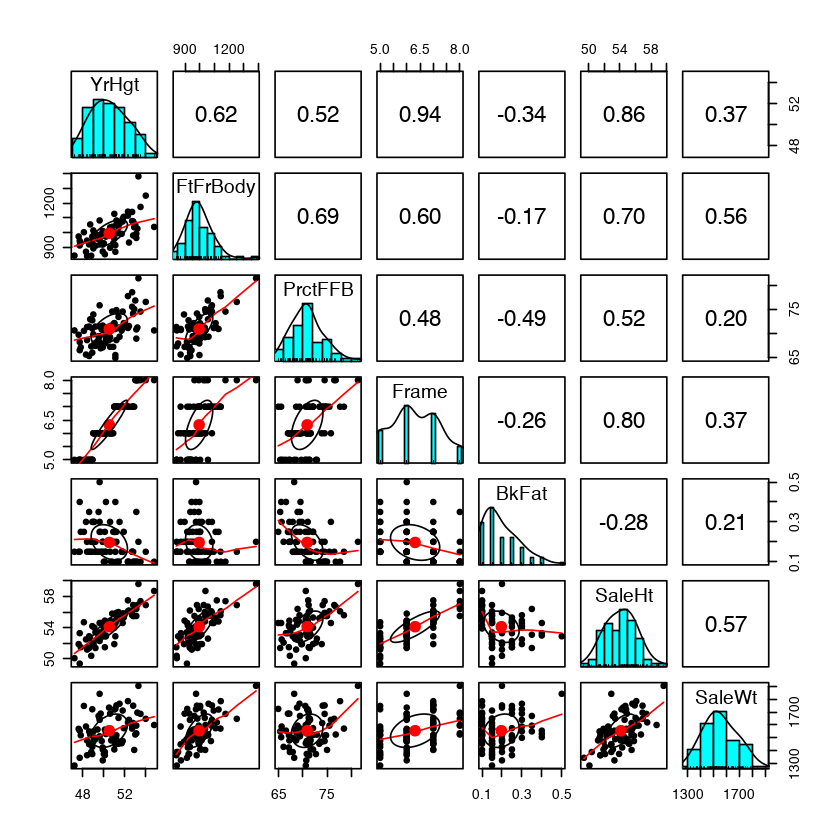

In [151]:
pairs.panels(bullsV7)

BkFat 변수는 한쪽으로 치우져 있습니다. 대칭성을 갖도록 변환이 필요한지 알아봅니다.

In [152]:
cor(bullsV7$YrHgt, bullsV7$BkFat)       # 키와 Fat 은 음 상관관계

[1] -0.344277

In [153]:
cor(bullsV7$YrHgt, log(bullsV7$BkFat))  # Fat 를 log 로 봐도 큰 차이가 상관관계 차이가 없는 것 같습니다.

[1] -0.4063381

In [154]:
cor(bullsV7$SaleWt, bullsV7$BkFat)  # 판매시 무게와  상관관계 는 양의 상관관계입니다.

[1] 0.2075349

In [155]:
cor(bullsV7$SaleWt, log(bullsV7$BkFat))  # 로그변환 한것과 상관관계

[1] 0.1543811

In [156]:
# 결국 로그변환해도 그렇게 큰 차이가 없는 것 같습니다.

#### 문제 1. 주성분의 표준편차와 주성분을 계산 하는데 사용된 rotation 값을 찾으시오.

In [157]:
# 문제를 풀기위해서 공분산 행렬을 이용합니다.
pca_cov = prcomp(bullsV7)
pca_cov

Standard deviations (1, .., p=7):
[1] 143.45596038  69.81887125   2.33005787   1.82107340   0.68471173
[6]   0.27212808   0.06722679

Rotation (n x k) = (7 x 7):
                   PC1           PC2          PC3          PC4           PC5
YrHgt    -5.887328e-03 -0.0096800709 -0.286337289 -0.608787152 -0.5355689528
FtFrBody -4.870470e-01 -0.8726966457  0.034277115  0.003226954 -0.0004437402
PrctFFB  -8.526499e-03 -0.0291964492 -0.904388519  0.425174911 -0.0083876301
Frame    -3.111988e-03 -0.0048861100 -0.133266834 -0.311194400 -0.3905733600
BkFat    -6.919922e-05  0.0004925452  0.018864084  0.005278296 -0.0119061237
SaleHt   -9.329509e-03 -0.0085770135 -0.284214793 -0.593037047  0.7485979836
SaleWt   -8.732589e-01  0.4871927200 -0.004846824  0.005597435 -0.0026647979
                   PC6           PC7
YrHgt    -0.5097273178  0.0245917521
FtFrBody -0.0004566049 -0.0002530995
PrctFFB   0.0103890723  0.0142927590
Frame     0.8552041268 -0.0379840767
BkFat     0.0437862261  0.9987777777


#### 표준화 사용 를 사용한다면 scale option 을 설정합니다.

In [158]:
pca = prcomp(bullsV7, scale=T)
pca

Standard deviations (1, .., p=7):
[1] 2.0299502 1.1563431 0.8610357 0.6491727 0.4310521 0.3827563 0.2169256

Rotation (n x k) = (7 x 7):
                PC1          PC2         PC3        PC4         PC5         PC6
YrHgt    -0.4499313 -0.042790217 -0.41570891  0.1133565 -0.06587066  0.07223418
FtFrBody -0.4123256  0.129836547  0.45029241  0.2474787  0.71934339  0.17706072
PrctFFB  -0.3555618 -0.315507785  0.56827313  0.3147874 -0.57936738 -0.12780009
Frame    -0.4339569  0.007728211 -0.45234503  0.2428179 -0.14299538  0.43414400
BkFat     0.1867048  0.714719363 -0.03873196  0.6181171 -0.16023789 -0.20801720
SaleHt   -0.4528538  0.101315086 -0.17665043 -0.2157694  0.10953536 -0.79928778
SaleWt   -0.2699470  0.600514834  0.25331192 -0.5824327 -0.29054729  0.27656055
                 PC7
YrHgt    -0.77492612
FtFrBody -0.01776760
PrctFFB   0.00239740
Frame     0.58233705
BkFat    -0.04244214
SaleHt    0.23672329
SaleWt   -0.04703601

* 여기서 주성분의 표준편차 = 고유값
* 주성분을 계산하는데 사용하는 rotation = 고유벡터
* 이부분은 다음에 설명할 예정입니다.

In [210]:
# 다음은 7개의 고유벡터 들의 곱을 계산해 보았다. 이들 벡터들은 서로 수직인 벡터입니다. 각 벡터를 구해서 서로 백터의 내적을 해보았습니다. 
# 그 결과 주성분이 같은 성분이면 1 이고 다르면 0 입니다.
prodm = matrix(0L, nrow = dim(pca$rotation)[1], ncol = dim(pca$rotation)[2])
for(i in 1:(dim(pca$rotation)[1])) {
    PCi = pca$rotation[,i]
    for(j in 1:(dim(pca$rotation)[1])) {
        PCj = pca$rotation[,j]
        mulij = PCi %*% PCj
        prodm[i,j] = round(mulij, 3)
    }
}
print (prodm)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    1    0    0    0    0    0    0
[2,]    0    1    0    0    0    0    0
[3,]    0    0    1    0    0    0    0
[4,]    0    0    0    1    0    0    0
[5,]    0    0    0    0    1    0    0
[6,]    0    0    0    0    0    1    0
[7,]    0    0    0    0    0    0    1


#### 문제 2 적절한 주성분의 개수를 선택하고 근거를 설명하시오.

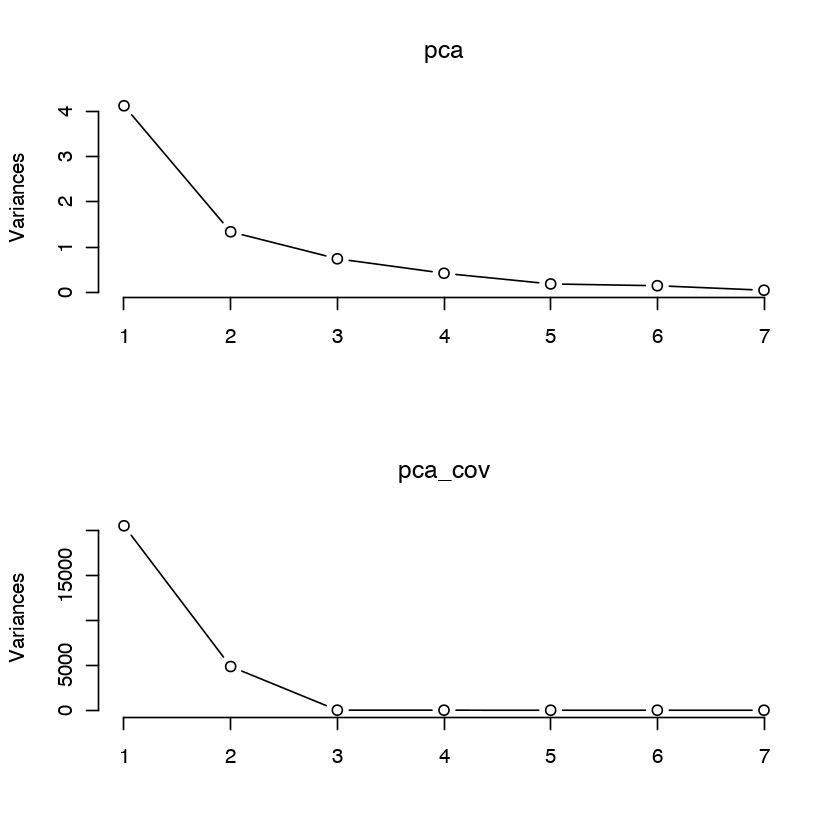

In [159]:
# 공부산 행렬 이용해봅니다. 표준 공분산 행렬과 공분산 행렬 두개를 비교해보면..
# 새로열로 2개를 나란히 표시
par(mfrow=c(2,1))
plot(pca, type = 'l')
plot(pca_cov, type = 'l')

* PCA_COR 에서 보면 제 3 주성분 부터 기울기가 완만하게 변하고, 그 이후로는 거의 의미기 없기 때문에 주성분을 3개로 선택합니다.

In [160]:
# 요약을 해보면
summary(pca_cov)

Importance of components:
                            PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     143.4560 69.8189 2.33006 1.82107 0.68471 0.2721 0.06723
Proportion of Variance   0.8082  0.1914 0.00021 0.00013 0.00002 0.0000 0.00000
Cumulative Proportion    0.8082  0.9996 0.99985 0.99998 1.00000 1.0000 1.00000

In [161]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0300 1.1563 0.8610 0.6492 0.43105 0.38276 0.21693
Proportion of Variance 0.5887 0.1910 0.1059 0.0602 0.02654 0.02093 0.00672
Cumulative Proportion  0.5887 0.7797 0.8856 0.9458 0.97235 0.99328 1.00000

#### 문 3. 주성분의 rotation 값을 표와 그래프를 사용해 비교하고 주성분의 의미를 해석하시오.

In [162]:
# 먼저 주축 PC1 을 가져와서 행렬값에 곱한 결과를 살펴보자.  이것은 AX = lambda X 가 될 것입니다.
a1 = pca$rotation[,1]
print(a1)

     YrHgt   FtFrBody    PrctFFB      Frame      BkFat     SaleHt     SaleWt 
-0.4499313 -0.4123256 -0.3555618 -0.4339569  0.1867048 -0.4528538 -0.2699470 


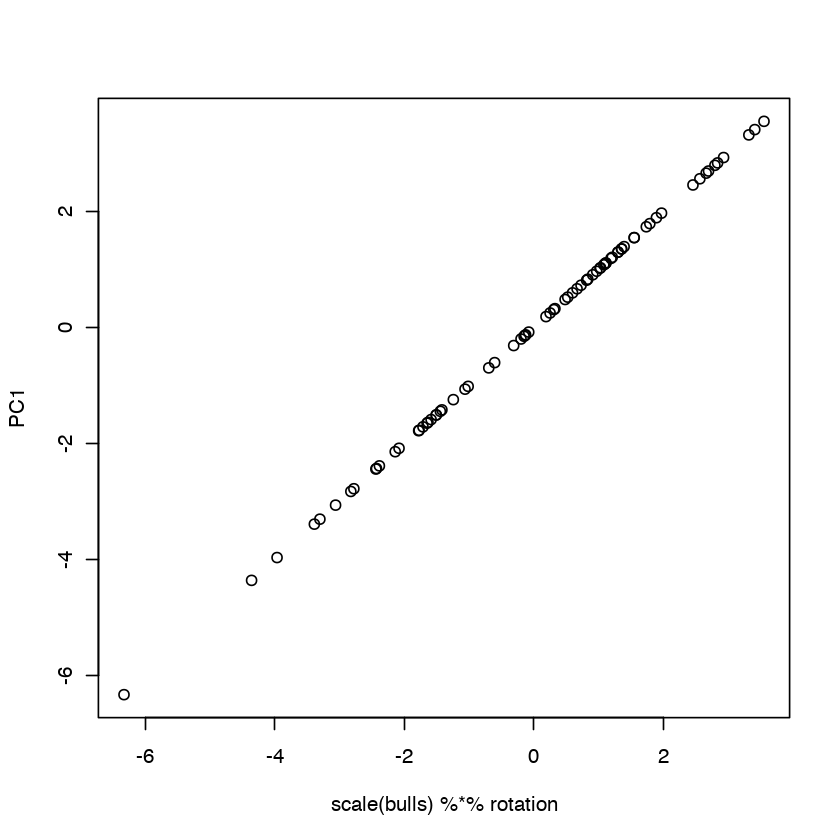

In [163]:
# 먼저 행렬의 주축값 즉 회전한 값을 보면 A*X = lambsa X 형태가 됩니다.
# 이것을 수식으로 나타내면 
#PC1 = (-0.45 * YrHgt) + (-0.41 * FtFrBody) + (-0.36 * PrctFFB) +
#       (-0.43 * Frame) + (0.19 * BkFat) + (-0.45 * SaleHt) + (-0.27 * SaleWt) 가 됩니다.
bulls_x = scale(bullsV7) %*% a1
plot(bulls_x, pca$x[,1], ylab = "PC1", xlab = "scale(bulls) %*% rotation")

In [164]:
# bulls_x 와 주성분 PC1 과의 상관관계는?
print(cor(bulls_x, pca$x[,1]))

     [,1]
[1,]    1


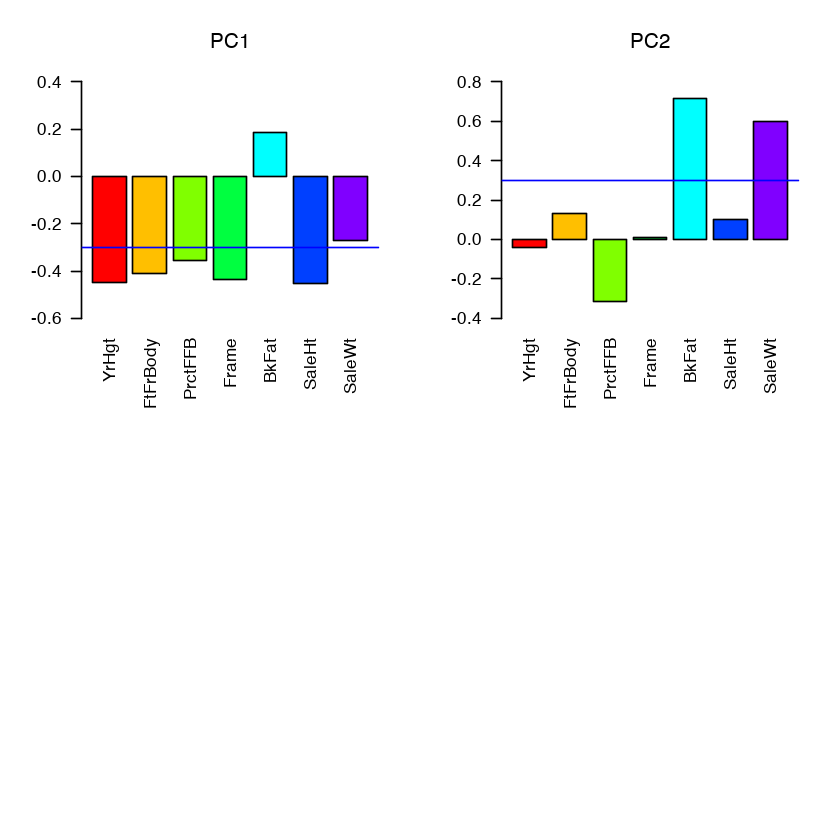

In [165]:
# 주성분 PC1, PC2 의 각 요소별 구성비율을 살펴보면 다음과 같습니다.
# 그래프를 2 by 2 로 나눕니다.
par(mfrow=c(2,2))
barplot(pca$rotation[,1], col = rainbow(8), ylim = c(-0.6,0.4), las = 2, main = "PC1")
abline(h = -0.3, col="blue")

barplot(pca$rotation[,2], col = rainbow(8), ylim = c(-0.4,0.8), las = 2, main = "PC2")
abline(h = 0.3, col="blue")
# 리셋

par(mfrow=c(1,1))

#### 문제 4 행렬도를 사용해서 원변수와 주성분의 관계, 원변수 간의 상관관계, 특이한 관측치 존재 유무를 파악하고 설명하시오.

In [166]:
# 1 공분산 행렬이용
# 먼저 공분산으로 행렬도을 그리면 변수사이 값 편차가 너무 커서 상관계수 행렬을 사용하여야 합니다. 지금 먼저 그것을 확인 하겠습니다.
head(bullsV7)

YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
51.0,1128,70.9,7,0.25,54.8,1720
51.9,1108,72.1,7,0.25,55.3,1575
49.9,1011,71.6,6,0.15,53.1,1410
53.1,993,68.9,8,0.35,56.4,1595
51.2,996,68.6,7,0.25,55.0,1488
49.2,985,71.4,6,0.15,51.4,1500


Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

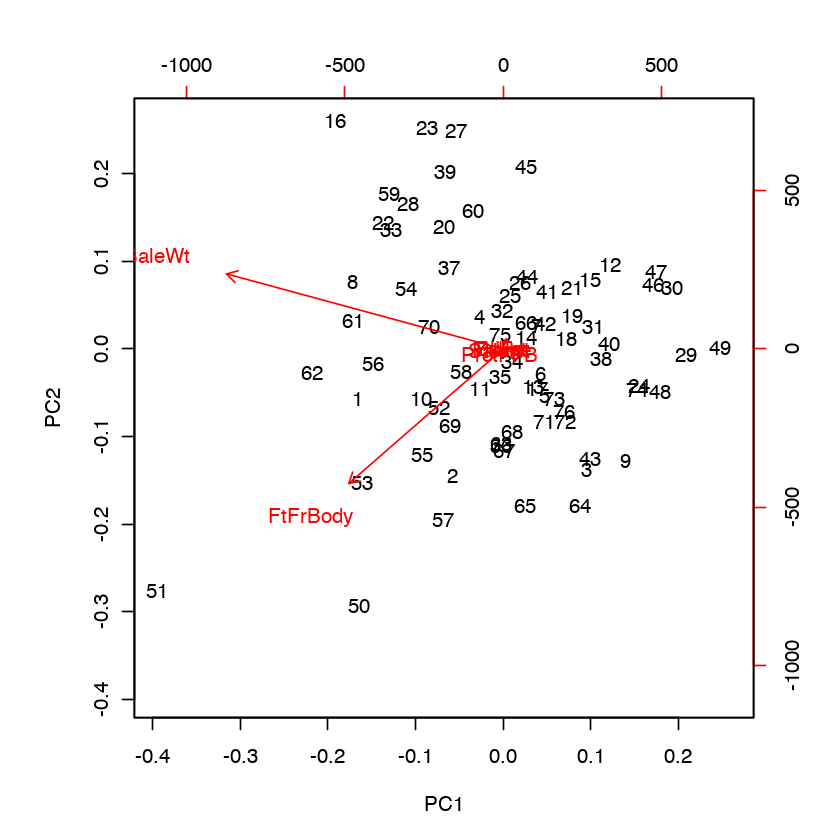

In [167]:
# 공분산 행렬을 이용해서 그림을 그리면
biplot(pca_cov)

In [168]:
# 상관계수 행렬 (표준화 행렬))
pca

Standard deviations (1, .., p=7):
[1] 2.0299502 1.1563431 0.8610357 0.6491727 0.4310521 0.3827563 0.2169256

Rotation (n x k) = (7 x 7):
                PC1          PC2         PC3        PC4         PC5         PC6
YrHgt    -0.4499313 -0.042790217 -0.41570891  0.1133565 -0.06587066  0.07223418
FtFrBody -0.4123256  0.129836547  0.45029241  0.2474787  0.71934339  0.17706072
PrctFFB  -0.3555618 -0.315507785  0.56827313  0.3147874 -0.57936738 -0.12780009
Frame    -0.4339569  0.007728211 -0.45234503  0.2428179 -0.14299538  0.43414400
BkFat     0.1867048  0.714719363 -0.03873196  0.6181171 -0.16023789 -0.20801720
SaleHt   -0.4528538  0.101315086 -0.17665043 -0.2157694  0.10953536 -0.79928778
SaleWt   -0.2699470  0.600514834  0.25331192 -0.5824327 -0.29054729  0.27656055
                 PC7
YrHgt    -0.77492612
FtFrBody -0.01776760
PrctFFB   0.00239740
Frame     0.58233705
BkFat    -0.04244214
SaleHt    0.23672329
SaleWt   -0.04703601

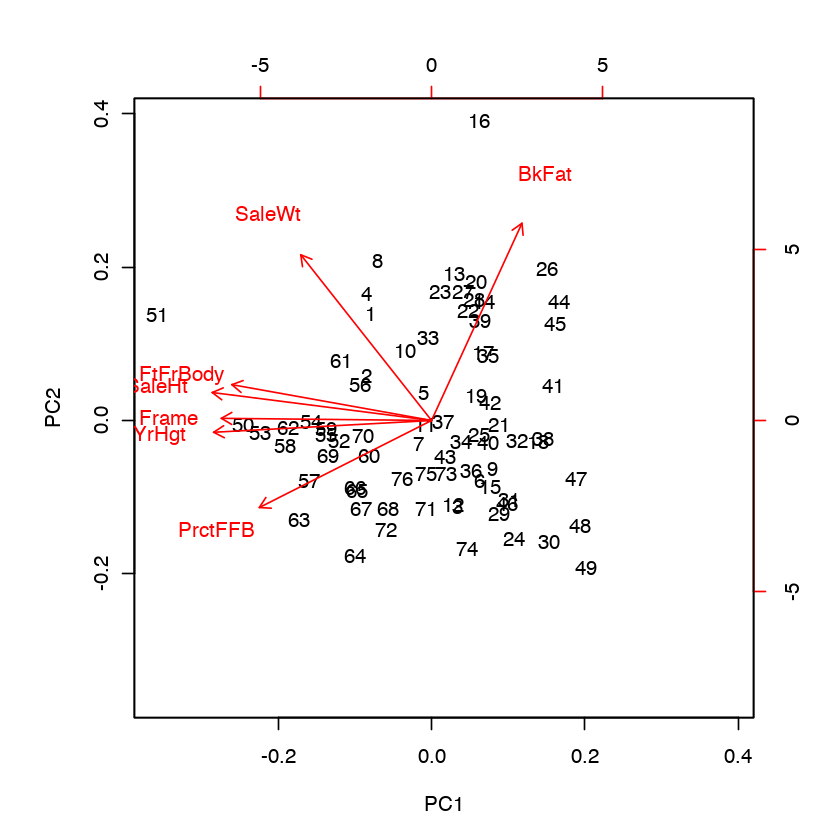

In [169]:
biplot(pca)

* 제1 성분, 제2 성분을 축으로 하여 주성분및 각 요소를 표시 합니다.
* BkFat, SaleWt 를 제외한 모든 변수는 PC1 에 기여를 합니다.
* BkFat, SaleWt 는 PC2 성분을 결정합니다.
* BkFit 는 PC1 성분들과 반대 성향이다. 즉 BkFit 커지면, 다른 값 SaleHt, YrHgt, Frame 등의 값은 작은 경향을 보인단. 

In [170]:
# BkFat 값이 큰소  그림에서 26, 44 번
bulls[c(26,44),]


,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
26,1,1800,47.7,944,66.5,5,0.40,53.3,1556
44,5,975,48.6,936,65.3,5,0.35,51.4,1550


In [171]:
# PrctFFB 값이 큰소 57,63 번 소
bulls[c(57,63),]

,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
57,8,1925,52.7,1141,78.5,7,0.15,55.6,1572
63,8,1825,53.0,1055,76.8,8,0.10,56.7,1526


In [172]:
# 위 4개를 전체적으로 비교하면
bulls[c(26, 44, 63, 57), ]

,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
26,1,1800,47.7,944,66.5,5,0.40,53.3,1556
44,5,975,48.6,936,65.3,5,0.35,51.4,1550
63,8,1825,53.0,1055,76.8,8,0.10,56.7,1526
57,8,1925,52.7,1141,78.5,7,0.15,55.6,1572


#### 문제 5. 첫 두개의 주성분을 사용해 산점도를 그리고 Breed 를 서로 다른 색깔과 기호로 표시 하시오. 
* 주성분에 의해 다른 종의 황소를 구분 할 수 있는 것인지 그리고 이상점 (outlier) 가 있는것인지 어떤 특성을 가진 것인지?

In [173]:
# Breed 를 범주형 변수로 변화 한다
summary(bulls)
bulls$Breed = factor(bulls$Breed)
summary(bulls)

     Breed           SalePr         YrHgt          FtFrBody     
 Min.   :1.000   Min.   : 975   Min.   :47.20   Min.   : 841.0  
 1st Qu.:1.000   1st Qu.:1375   1st Qu.:49.17   1st Qu.: 932.5  
 Median :5.000   Median :1550   Median :50.35   Median : 990.5  
 Mean   :4.382   Mean   :1742   Mean   :50.52   Mean   : 995.9  
 3rd Qu.:8.000   3rd Qu.:1900   3rd Qu.:51.73   3rd Qu.:1039.2  
 Max.   :8.000   Max.   :4600   Max.   :54.80   Max.   :1383.0  
    PrctFFB          Frame           BkFat            SaleHt     
 Min.   :64.90   Min.   :5.000   Min.   :0.1000   Min.   :49.40  
 1st Qu.:68.60   1st Qu.:6.000   1st Qu.:0.1500   1st Qu.:52.83  
 Median :70.85   Median :6.000   Median :0.1500   Median :54.30  
 Mean   :70.88   Mean   :6.316   Mean   :0.1967   Mean   :54.13  
 3rd Qu.:72.25   3rd Qu.:7.000   3rd Qu.:0.2500   3rd Qu.:55.50  
 Max.   :81.40   Max.   :8.000   Max.   :0.5000   Max.   :59.60  
     SaleWt    
 Min.   :1285  
 1st Qu.:1474  
 Median :1538  
 Mean   :1555  
 3r

 Breed      SalePr         YrHgt          FtFrBody         PrctFFB     
 1:32   Min.   : 975   Min.   :47.20   Min.   : 841.0   Min.   :64.90  
 5:17   1st Qu.:1375   1st Qu.:49.17   1st Qu.: 932.5   1st Qu.:68.60  
 8:27   Median :1550   Median :50.35   Median : 990.5   Median :70.85  
        Mean   :1742   Mean   :50.52   Mean   : 995.9   Mean   :70.88  
        3rd Qu.:1900   3rd Qu.:51.73   3rd Qu.:1039.2   3rd Qu.:72.25  
        Max.   :4600   Max.   :54.80   Max.   :1383.0   Max.   :81.40  
     Frame           BkFat            SaleHt          SaleWt    
 Min.   :5.000   Min.   :0.1000   Min.   :49.40   Min.   :1285  
 1st Qu.:6.000   1st Qu.:0.1500   1st Qu.:52.83   1st Qu.:1474  
 Median :6.000   Median :0.1500   Median :54.30   Median :1538  
 Mean   :6.316   Mean   :0.1967   Mean   :54.13   Mean   :1555  
 3rd Qu.:7.000   3rd Qu.:0.2500   3rd Qu.:55.50   3rd Qu.:1648  
 Max.   :8.000   Max.   :0.5000   Max.   :59.60   Max.   :1904  

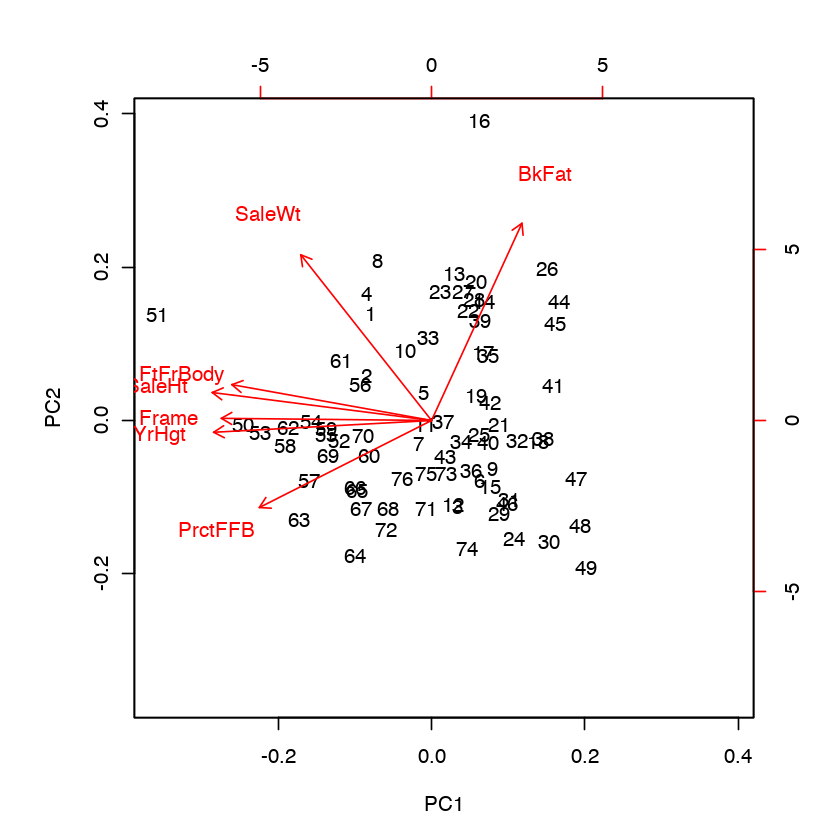

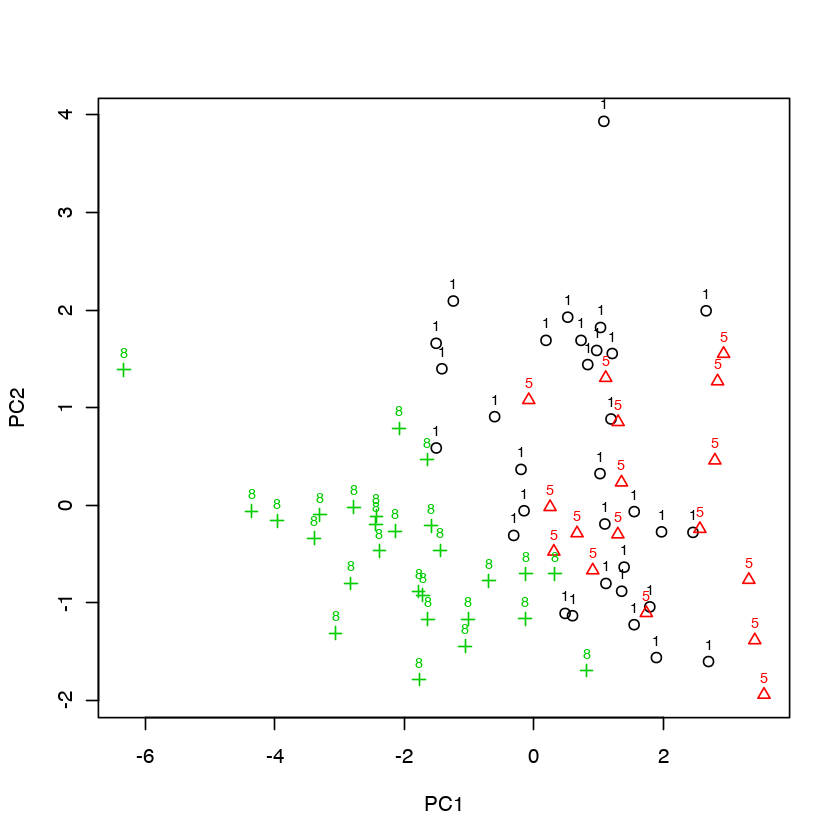

In [174]:
par(mfcol=c(1,1))
biplot(pca)
plot(pca$x[,1], pca$x[,2], xlab = "PC1", ylab = "PC2",
     pch = as.numeric(bulls$Breed), col = as.numeric(bulls$Breed))
text(pca$x[,1], pca$x[,2], labels = as.character(bulls$Breed),
     cex = 0.7, pos = 3, col = as.numeric(bulls$Breed))
par(mfcol=c(1,1))

* 아래쪽 그래프를 보면 제1주성분으로 8번종의 소는 구별 할 수 있다.
* 1번 종과 5번 종은 비숫한 특성으로 섞여 있다.

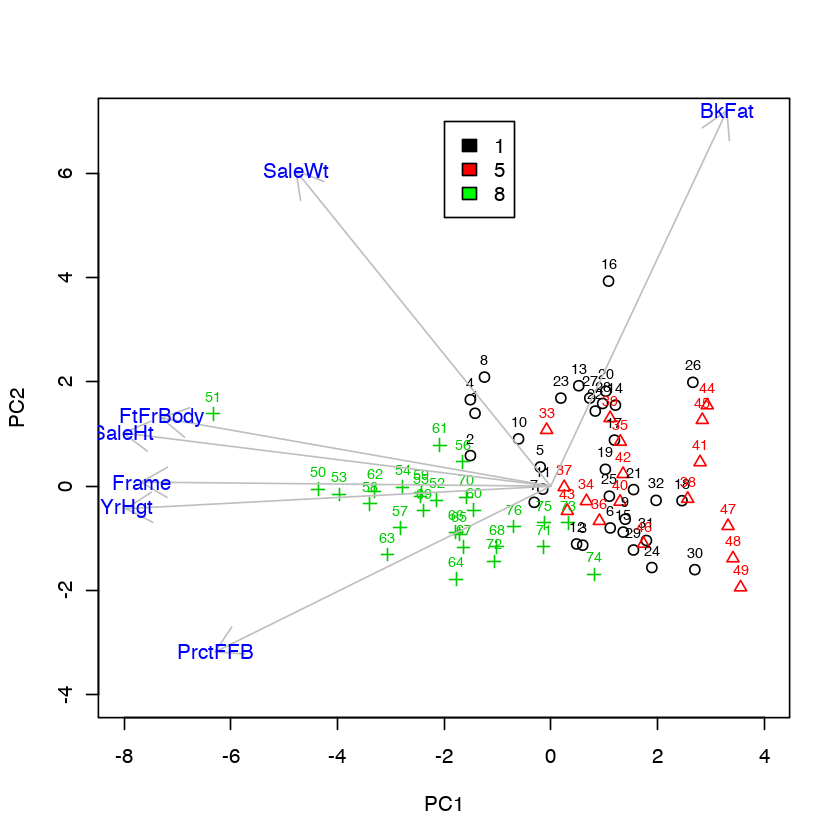

In [175]:
# 1번종과 5번종을 구분하기 위해서...
plabels = paste(as.character(bulls$Breed), rownames(bulls), sep = '-')
plot(pca$x[,1], pca$x[,2], xlab = "PC1", ylab = "PC2", xlim = c(-8,4), ylim = c(-4,7),
     pch = as.numeric(bulls$Breed), col = as.numeric(bulls$Breed))
text(pca$x[,1], pca$x[,2], labels = rownames(bulls),
     cex = 0.7, pos = 3, col = as.numeric(bulls$Breed))
legend(-2, 7, c(1,5,8), col = c("black", "red", "green"), fill = c("black", "red", "green"))



lambda <- pca$sdev * sqrt(nrow(pca$x))
Rot <- t(t(pca$rotation)*lambda)
arrows(rep(0,nrow(pca$rotation)), rep(0,nrow(pca$rotation)), Rot[,1], Rot[,2], col = "grey")
text(Rot[,1:2], rownames(Rot), col = "blue")

In [176]:
# 1 번종은 5번 종에 비해서 BkFat, SaleWt 가 큰 경향이 보인다.

In [177]:
# 이상점 (outlier) 를 찾아보면
# 16번 소, 51번 소가 특이점을 보인다.
bulls[c(16,51),]


,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
16,1,2300,49.6,975,68.2,6,0.5,52.9,1842
51,8,1450,53.3,1383,81.4,8,0.2,59.6,1904


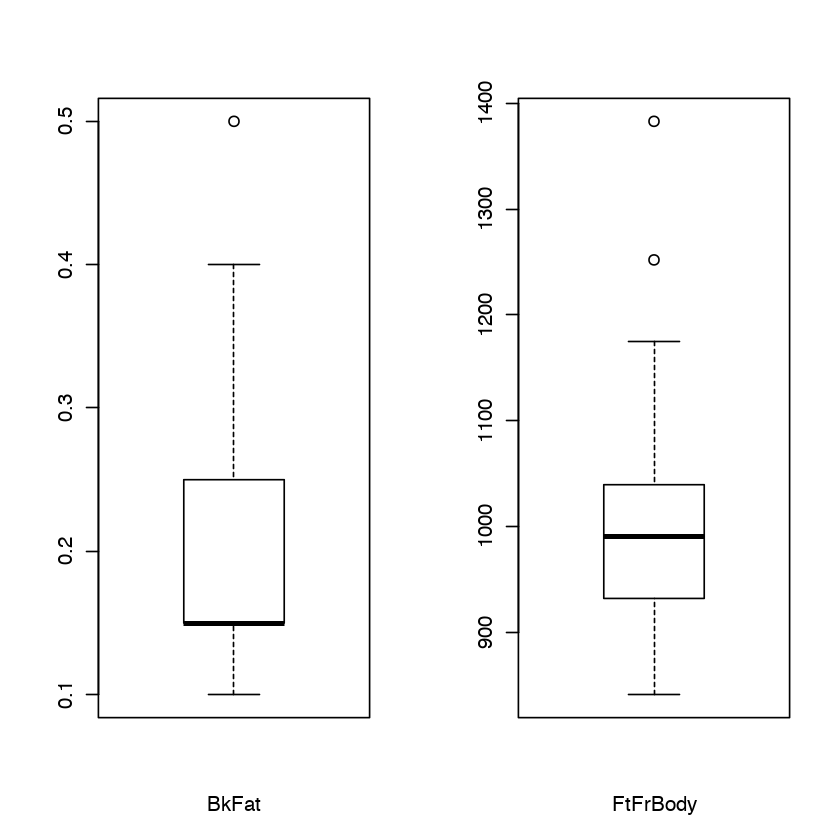

In [178]:
par(mfcol=c(1,2))
boxplot(bulls$BkFat, xlab = "BkFat")
boxplot(bulls$FtFrBody, xlab = "FtFrBody")
par(mfcol=c(1,1))

#### 문제 6. 주성분을 사용해 Q-Q(quantile-quantile) plot 을 그리고 해석하시오


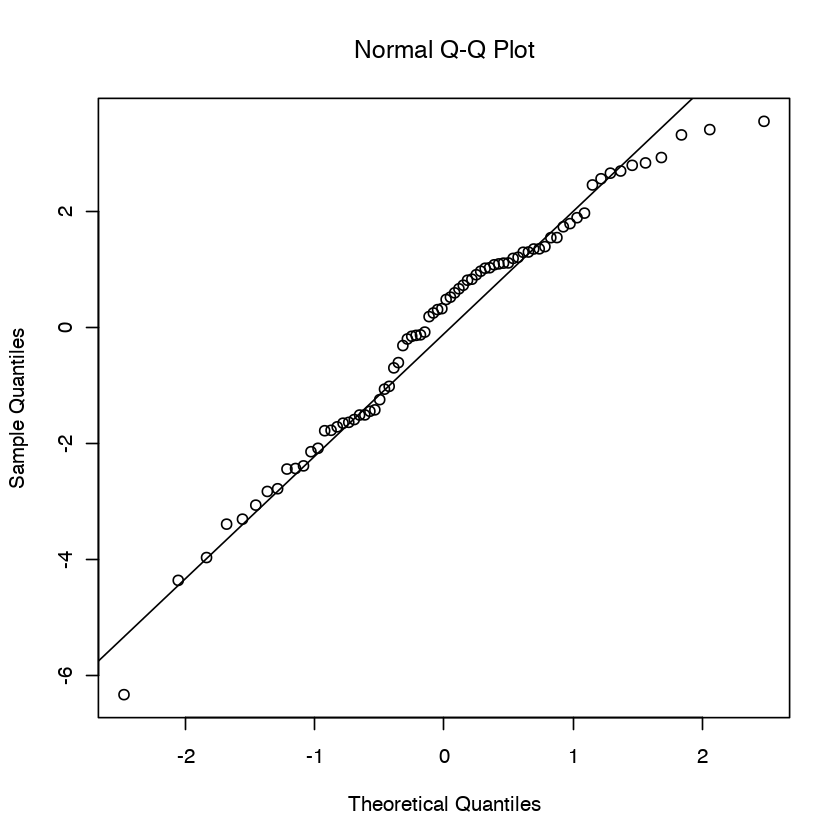

In [179]:
qqnorm(pca$x[,1])
qqline(pca$x[,1])

In [180]:
shapiro.test(pca$x[,1])


	Shapiro-Wilk normality test

data:  pca$x[, 1]
W = 0.96961, p-value = 0.06496


In [181]:
# p-value > 0.05 이므로 정규 분포를 따른다고 한다. 
# (영가설 H0 는 모집단은 정규분포를 따른다 )

## 통계적 가설은 다음에 간단하게 설명